In [2]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import geopy.distance as distance

In [3]:
training = pd.read_csv('Data/ab_wind_train_data.txt')
testing = pd.read_csv('Data/ab_wind_test_data.txt')

C:\Users\PPL\AppData\Local\Temp\ipykernel_47404\1285623481.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  training = pd.read_csv('Data/ab_wind_train_data.txt')
C:\Users\PPL\AppData\Local\Temp\ipykernel_47404\1285623481.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  testing = pd.read_csv('Data/ab_wind_test_data.txt')


In [24]:
training.loc[training['name']=="EDSON CLIMATE"].shape

(85156, 9)

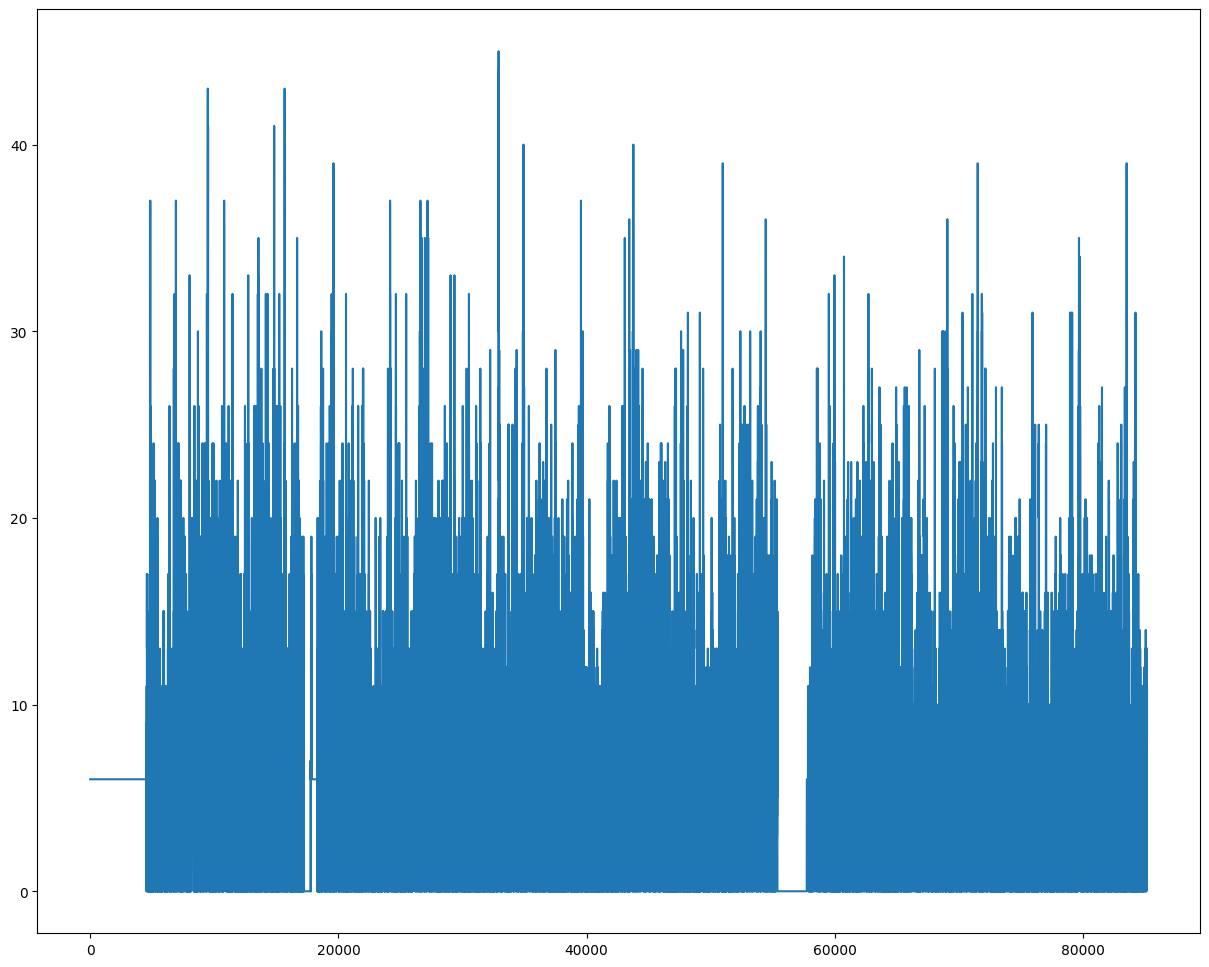

In [26]:
plt.figure(figsize=(15,12))

head_size = 85156

x = range(0, head_size)
plt.plot(x, training.loc[training['name']=="EDSON CLIMATE"]['wind_speed'].head(head_size))

In [356]:
np_features = np.array(features)
np_target = np.array(target)

In [359]:
np_target.max()

69.0

In [351]:
train_x = np_features[:40000]
train_y = target[:40000]

test_x = np_features[40000:]
test_y = target[40000:]

In [342]:
from joblib import dump, load

In [352]:
train_x = preprocessing.normalize(train_x, norm='l2')

test_x = preprocessing.normalize(test_x, norm='l2')

In [353]:
reg = LinearRegression().fit(train_x, train_y)

pred = reg.predict(test_x)

rfScore=r2_score(test_y, pred)

print(rfScore)
print(mean_squared_error(test_y, pred))

0.4376419910698508
42.07753437525544


In [354]:
regr = MLPRegressor().fit(train_x, train_y)
regr_pred = regr.predict(test_x)

rfScore=r2_score(test_y, regr_pred)

print(rfScore)
print(mean_squared_error(test_y, regr_pred))

0.45455362813535716
40.81214830683355


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
#dump(regr, 'MlpWindModel.joblib') 

['MlpWindModel.joblib']

NameError: name 'sns' is not defined

<Figure size 1500x1200 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))

ax = plt.gca()

#plt.plot(target1)
plt.plot(target1, np.array(features1)[:,-1])
plt.xlabel('Original values')
plt.ylabel('Predicted values')